# Module 4

### **4.1 Add call and Use Classification model**

In [1]:
import pandas as pd

In [2]:
#use data with bollinger band columns
sdf=pd.read_csv('C:/Users/sakshi/Desktop/ai/week3.csv')
sdf.index = sdf['Date'].astype('datetime64')
sdf.head()

,Date,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Trends,14_day_Avg,14_day_std,Upper_Band,Lower_Band
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-15,2017-05-15,INFY,EQ,964.25,963.5,963.50,949.10,953.25,951.55,951.49,...,83.67,5,2017,951.550000,0.000000,Slight or No change,NaN,NaN,NaN,NaN
2017-05-16,2017-05-16,INFY,EQ,951.55,953.1,960.15,946.95,956.00,955.00,952.92,...,60.62,5,2017,953.125077,0.003626,Slight or No change,NaN,NaN,NaN,NaN
2017-05-17,2017-05-17,INFY,EQ,955.00,951.6,958.45,943.85,952.90,952.80,949.48,...,54.35,5,2017,953.067084,-0.002304,Slight or No change,NaN,NaN,NaN,NaN
2017-05-18,2017-05-18,INFY,EQ,952.80,943.0,973.90,942.85,960.25,961.75,962.61,...,57.32,5,2017,955.934447,0.009393,Slight positive,NaN,NaN,NaN,NaN
2017-05-19,2017-05-19,INFY,EQ,961.75,961.5,962.70,947.85,957.40,957.95,954.18,...,68.48,5,2017,956.233874,-0.003951,Slight or No change,NaN,NaN,NaN,NaN


In [3]:
#Call function to separate different price range 
def call(sdf):
    if(sdf['Close Price']<sdf['Lower_Band']):
        val='Buy'
    elif((sdf['Close Price']>=sdf['Lower_Band']) & (sdf['Close Price']<sdf['14_day_Avg'])):
        val='Hold Buy'
    elif((sdf['Close Price']>=sdf['14_day_Avg']) & (sdf['Close Price']<sdf['Upper_Band'])):
        val='Hold Short'
    elif(sdf['Close Price']>=sdf['Upper_Band']):
        val='Short'
    else:
        val='None'
    return val



In [4]:
#apply it over the complete data frame
sdf['Call'] = sdf[:].apply(call, axis = 1) 
sdf

,Date,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Month,Year,VWAP,Day_Perc_Change,Trends,14_day_Avg,14_day_std,Upper_Band,Lower_Band,Call
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-15,2017-05-15,INFY,EQ,964.25,963.50,963.50,949.10,953.25,951.55,951.49,...,5,2017,951.550000,0.000000,Slight or No change,NaN,NaN,NaN,NaN,None
2017-05-16,2017-05-16,INFY,EQ,951.55,953.10,960.15,946.95,956.00,955.00,952.92,...,5,2017,953.125077,0.003626,Slight or No change,NaN,NaN,NaN,NaN,None
2017-05-17,2017-05-17,INFY,EQ,955.00,951.60,958.45,943.85,952.90,952.80,949.48,...,5,2017,953.067084,-0.002304,Slight or No change,NaN,NaN,NaN,NaN,None
2017-05-18,2017-05-18,INFY,EQ,952.80,943.00,973.90,942.85,960.25,961.75,962.61,...,5,2017,955.934447,0.009393,Slight positive,NaN,NaN,NaN,NaN,None
2017-05-19,2017-05-19,INFY,EQ,961.75,961.50,962.70,947.85,957.40,957.95,954.18,...,5,2017,956.233874,-0.003951,Slight or No change,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,2019-05-07,INFY,EQ,718.40,720.40,727.90,718.70,724.40,724.55,724.51,...,5,2019,904.435998,0.008561,Slight positive,729.810714,10.288365,750.387444,709.233984,Hold Buy
2019-05-08,2019-05-08,INFY,EQ,724.55,721.00,726.00,716.50,718.95,719.35,721.65,...,5,2019,904.046560,-0.007177,Slight Negative,727.782143,9.223936,746.230016,709.334270,Hold Buy
2019-05-09,2019-05-09,INFY,EQ,719.35,719.15,730.30,715.80,722.00,721.05,724.48,...,5,2019,903.591847,0.002363,Slight or No change,727.321429,9.398542,746.118512,708.524346,Hold Buy


In [5]:
trend=sdf.groupby('Call').count()['Symbol'].sort_values()
trend

Call
None           13
Buy            14
Short          28
Hold Buy      189
Hold Short    250
Name: Symbol, dtype: int64

In [6]:
#Train a Classification model with different dependent and independent columns
X = sdf[['Close Price', 'Upper_Band', 'Lower_Band', '14_day_Avg']][13:]
y = sdf['Call'][13:]

#split df for train and test requirements
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [7]:
#module to check the accuracy of different models
from sklearn.metrics import accuracy_score

77.720207253886


AttributeError: 'list' object has no attribute 'show'

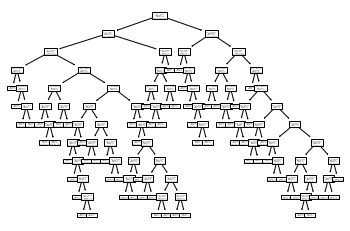

In [25]:
#Decision Tree:

from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth =60)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)*100
print(accuracy)
t=tree.plot_tree(model)
t.show()

In [30]:
#Random Forest:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)*100
print(accuracy)

84.4559585492228


In [31]:
#SVM Classifier:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)*100
print(accuracy)

54.92227979274611


In [45]:
#Nearest Neighbors:
from sklearn import neighbors

model = neighbors.KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)*100
print(accuracy)

83.93782383419689


In [46]:
#Gaussian Naive Bayes:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)*100
print(accuracy)

54.40414507772021


In [47]:
#Logistic Regression:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)*100
print(accuracy)

97.40932642487047


c:\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [48]:
#Neural network - Multi-layer Perceptron:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)*100
print(accuracy)

61.13989637305699


In [49]:
#import another stock to use the model created on it
sdf_2=pd.read_csv('C:/Users/sakshi/Desktop/ai/Large_Cap/Large_Cap/RELIANCE.csv')
sdf_2 = sdf_2[sdf_2['Series'] == 'EQ']

sdf_2.index = sdf_2['Date'].astype('datetime64')
sdf_2

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,,
2017-05-15,RELIANCE,EQ,15-May-2017,1350.45,1356.40,1356.40,1333.50,1343.60,1344.10,1344.22,1540213,2.070379e+09,75812,802733,52.12
2017-05-16,RELIANCE,EQ,16-May-2017,1344.10,1346.05,1376.90,1341.00,1356.20,1356.30,1360.59,2892947,3.936121e+09,79767,1238129,42.80
2017-05-17,RELIANCE,EQ,17-May-2017,1356.30,1353.00,1365.95,1347.75,1350.00,1353.10,1354.16,2250304,3.047263e+09,56277,1225837,54.47
2017-05-18,RELIANCE,EQ,18-May-2017,1353.10,1340.25,1350.00,1324.10,1327.45,1327.35,1336.14,2237916,2.990178e+09,84723,1339478,59.85
2017-05-19,RELIANCE,EQ,19-May-2017,1327.35,1333.00,1335.70,1310.00,1318.20,1318.85,1321.99,2928883,3.871940e+09,115988,1444387,49.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,RELIANCE,EQ,07-May-2019,1384.90,1394.80,1395.00,1340.20,1341.00,1343.50,1361.64,8877095,1.208739e+10,214252,4066700,45.81
2019-05-08,RELIANCE,EQ,08-May-2019,1343.50,1340.00,1340.00,1292.20,1297.75,1299.45,1313.10,14610543,1.918510e+10,354813,6922545,47.38
2019-05-09,RELIANCE,EQ,09-May-2019,1299.45,1288.80,1288.80,1251.75,1253.15,1256.45,1265.10,19507368,2.467876e+10,389079,9685998,49.65


In [50]:
#add bollinger columns to this stock data
sdf_2.insert(15,column='14_day_Avg', value=sdf_2['Close Price'].rolling(14).mean())
sdf_2.insert(16,column='14_day_std', value=sdf_2['Close Price'].rolling(14).std())
sdf_2.insert(17,column='Upper_Band', value=sdf_2['14_day_Avg'] + sdf_2['14_day_std']*2)     
sdf_2.insert(18,column='Lower_Band', value=sdf_2['14_day_Avg'] - sdf_2['14_day_std']*2)
sdf_2.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14_day_Avg,14_day_std,Upper_Band,Lower_Band
Date,,,,,,,,,,,,,,,,,,,
2017-05-15,RELIANCE,EQ,15-May-2017,1350.45,1356.40,1356.40,1333.50,1343.60,1344.10,1344.22,1540213,2.070379e+09,75812,802733,52.12,NaN,NaN,NaN,NaN
2017-05-16,RELIANCE,EQ,16-May-2017,1344.10,1346.05,1376.90,1341.00,1356.20,1356.30,1360.59,2892947,3.936121e+09,79767,1238129,42.80,NaN,NaN,NaN,NaN
2017-05-17,RELIANCE,EQ,17-May-2017,1356.30,1353.00,1365.95,1347.75,1350.00,1353.10,1354.16,2250304,3.047263e+09,56277,1225837,54.47,NaN,NaN,NaN,NaN
2017-05-18,RELIANCE,EQ,18-May-2017,1353.10,1340.25,1350.00,1324.10,1327.45,1327.35,1336.14,2237916,2.990178e+09,84723,1339478,59.85,NaN,NaN,NaN,NaN
2017-05-19,RELIANCE,EQ,19-May-2017,1327.35,1333.00,1335.70,1310.00,1318.20,1318.85,1321.99,2928883,3.871940e+09,115988,1444387,49.32,NaN,NaN,NaN,NaN


In [51]:
sdf_2.tail()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14_day_Avg,14_day_std,Upper_Band,Lower_Band
Date,,,,,,,,,,,,,,,,,,,
2019-05-07,RELIANCE,EQ,07-May-2019,1384.90,1394.8,1395.0,1340.20,1341.00,1343.50,1361.64,8877095,1.208739e+10,214252,4066700,45.81,1372.282143,25.143286,1422.568716,1321.995570
2019-05-08,RELIANCE,EQ,08-May-2019,1343.50,1340.0,1340.0,1292.20,1297.75,1299.45,1313.10,14610543,1.918510e+10,354813,6922545,47.38,1369.164286,31.052353,1431.268992,1307.059580
2019-05-09,RELIANCE,EQ,09-May-2019,1299.45,1288.8,1288.8,1251.75,1253.15,1256.45,1265.10,19507368,2.467876e+10,389079,9685998,49.65,1363.185714,42.875048,1448.935811,1277.435617
2019-05-10,RELIANCE,EQ,10-May-2019,1256.45,1265.0,1277.7,1245.00,1245.75,1251.15,1263.56,11226831,1.418577e+10,231193,3221387,28.69,1356.571429,52.226783,1461.024994,1252.117864
2019-05-13,RELIANCE,EQ,13-May-2019,1251.15,1247.9,1260.8,1227.50,1229.90,1232.05,1246.96,8047801,1.003525e+10,165987,2507496,31.16,1345.578571,61.023302,1467.625175,1223.531968


In [52]:
sdf_2.fillna(0,inplace=True)

In [53]:
#use model to predict 
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

c:\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [54]:
x=sdf_2[['Close Price','Upper_Band','Lower_Band','14_day_Avg']]
y=model.predict(x)


In [55]:
sdf_2['Call']=y

In [56]:
sdf_2['Call'].iloc[0:13] = "Not Available"

c:\python\python37\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [57]:
sdf_2.Call.value_counts()

Hold Short       245
Hold Buy         189
Short             32
Buy               15
Not Available     13
Name: Call, dtype: int64

In [58]:
#cross checking if model is accurate or not
sdf_2['Calls'] = sdf_2[13:].apply(call, axis = 1) 
sdf_2.tail(50)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14_day_Avg,14_day_std,Upper_Band,Lower_Band,Call,Calls
Date,,,,,,,,,,,,,,,,,,,,,
2019-02-25,RELIANCE,EQ,25-Feb-2019,1232.35,1236.00,1243.00,1220.65,1231.30,1232.30,1232.29,...,9.676593e+09,159793,3212379,40.91,1248.907143,27.315429,1303.538000,1194.276286,Hold Buy,Hold Buy
2019-02-26,RELIANCE,EQ,26-Feb-2019,1232.30,1209.50,1234.80,1206.00,1220.20,1220.25,1221.22,...,1.237229e+10,166251,3886999,38.37,1242.478571,21.802326,1286.083224,1198.873919,Hold Buy,Hold Buy
2019-02-27,RELIANCE,EQ,27-Feb-2019,1220.25,1228.05,1244.90,1209.00,1220.65,1223.50,1227.12,...,1.363725e+10,222847,4163615,37.47,1237.700000,17.372558,1272.445116,1202.954884,Hold Buy,Hold Buy
2019-02-28,RELIANCE,EQ,28-Feb-2019,1223.50,1233.75,1239.85,1226.55,1232.00,1231.05,1233.07,...,1.391757e+10,179607,5923497,52.48,1234.367857,13.045049,1260.457956,1208.277759,Hold Buy,Hold Buy
2019-03-01,RELIANCE,EQ,01-Mar-2019,1231.05,1237.00,1242.35,1222.25,1225.00,1226.05,1229.08,...,9.737414e+09,156673,4129082,52.12,1232.425000,12.000188,1256.425377,1208.424623,Hold Buy,Hold Buy
2019-03-05,RELIANCE,EQ,05-Mar-2019,1226.05,1223.40,1239.80,1218.60,1237.45,1237.65,1229.02,...,8.752505e+09,177673,2886956,40.54,1231.085714,9.997873,1251.081461,1211.089967,Hold Short,Hold Short
2019-03-06,RELIANCE,EQ,06-Mar-2019,1237.65,1239.80,1273.10,1235.10,1262.00,1264.80,1257.64,...,1.513972e+10,228963,4441001,36.89,1232.432143,12.978601,1258.389345,1206.474941,Short,Short
2019-03-07,RELIANCE,EQ,07-Mar-2019,1264.80,1264.00,1279.80,1258.15,1270.00,1270.25,1271.70,...,1.031257e+10,180667,3006231,37.07,1235.721429,16.173872,1268.069172,1203.373685,Short,Short
2019-03-08,RELIANCE,EQ,08-Mar-2019,1270.25,1266.05,1274.45,1262.00,1266.90,1267.10,1267.28,...,7.654451e+09,137676,3019726,50.00,1237.339286,18.128825,1273.596936,1201.081636,Hold Short,Hold Short


In [59]:
sdf_2.Calls.value_counts()

Hold Short    247
Hold Buy      185
Short          34
Buy            15
Name: Calls, dtype: int64

In [60]:
del sdf_2['Calls']

In [61]:
sdf_2.shape

(494, 20)

### **4.2 RandomForest classifier**

In [64]:
infy=pd.read_csv('C:/Users/sakshi/Desktop/ai/infy.csv')
infy = infy[infy['Series'] == 'EQ']
infy.shape

(494, 15)

In [65]:
#percentage change b/w open and close Price for a day
infy['pc_oc']=(infy['Close Price']-infy['Open Price'])/infy['Open Price']*100
#percentage change b/w low and high price for the day
infy['pc_lh']=(infy['High Price']-infy['Low Price'])/infy['Low Price']*100
#5 day rolling mean of close Price
infy['rol_mean_5']=(infy['Close Price'].pct_change()).rolling(5).mean()
#5 day rolling std of close Price
infy['rol_std_5']=(infy['Close Price'].pct_change()).rolling(5).std()
infy

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,pc_oc,pc_lh,rol_mean_5,rol_std_5
0,INFY,EQ,15-May-2017,964.25,963.50,963.50,949.10,953.25,951.55,951.49,3648582,3.471580e+09,75335,3052819,83.67,-1.240270,1.517227,NaN,NaN
1,INFY,EQ,16-May-2017,951.55,953.10,960.15,946.95,956.00,955.00,952.92,3065084,2.920775e+09,71808,1858063,60.62,0.199349,1.393949,NaN,NaN
2,INFY,EQ,17-May-2017,955.00,951.60,958.45,943.85,952.90,952.80,949.48,1457754,1.384110e+09,75429,792251,54.35,0.126103,1.546856,NaN,NaN
3,INFY,EQ,18-May-2017,952.80,943.00,973.90,942.85,960.25,961.75,962.61,4028924,3.878282e+09,120990,2309450,57.32,1.988335,3.293207,NaN,NaN
4,INFY,EQ,19-May-2017,961.75,961.50,962.70,947.85,957.40,957.95,954.18,2128698,2.031155e+09,88897,1457747,68.48,-0.369215,1.566704,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,INFY,EQ,07-May-2019,718.40,720.40,727.90,718.70,724.40,724.55,724.51,5747536,4.164127e+09,104342,3690425,64.21,0.576069,1.280089,-0.003548,0.017567
492,INFY,EQ,08-May-2019,724.55,721.00,726.00,716.50,718.95,719.35,721.65,6247642,4.508603e+09,162077,3950857,63.24,-0.228849,1.325890,-0.008601,0.012764
493,INFY,EQ,09-May-2019,719.35,719.15,730.30,715.80,722.00,721.05,724.48,7396525,5.358635e+09,242225,4808832,65.01,0.264201,2.025706,-0.002658,0.007806
494,INFY,EQ,10-May-2019,721.05,720.80,726.00,715.00,716.50,716.85,717.88,8352335,5.995942e+09,181229,5545377,66.39,-0.548002,1.538462,-0.001853,0.007050


In [66]:
#new Action column 
infy['Action']=0
for i in range(len(infy)-1):
    if(infy['Close Price'].iloc[i+1]>infy['Close Price'].iloc[i]):
        infy['Action'].iloc[i]=1
    elif(infy['Close Price'].iloc[i+1]<infy['Close Price'].iloc[i]):
        infy['Action'].iloc[i]=-1

c:\python\python37\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [67]:

infy

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,pc_oc,pc_lh,rol_mean_5,rol_std_5,Action
0,INFY,EQ,15-May-2017,964.25,963.50,963.50,949.10,953.25,951.55,951.49,3648582,3.471580e+09,75335,3052819,83.67,-1.240270,1.517227,NaN,NaN,1
1,INFY,EQ,16-May-2017,951.55,953.10,960.15,946.95,956.00,955.00,952.92,3065084,2.920775e+09,71808,1858063,60.62,0.199349,1.393949,NaN,NaN,-1
2,INFY,EQ,17-May-2017,955.00,951.60,958.45,943.85,952.90,952.80,949.48,1457754,1.384110e+09,75429,792251,54.35,0.126103,1.546856,NaN,NaN,1
3,INFY,EQ,18-May-2017,952.80,943.00,973.90,942.85,960.25,961.75,962.61,4028924,3.878282e+09,120990,2309450,57.32,1.988335,3.293207,NaN,NaN,-1
4,INFY,EQ,19-May-2017,961.75,961.50,962.70,947.85,957.40,957.95,954.18,2128698,2.031155e+09,88897,1457747,68.48,-0.369215,1.566704,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,INFY,EQ,07-May-2019,718.40,720.40,727.90,718.70,724.40,724.55,724.51,5747536,4.164127e+09,104342,3690425,64.21,0.576069,1.280089,-0.003548,0.017567,-1
492,INFY,EQ,08-May-2019,724.55,721.00,726.00,716.50,718.95,719.35,721.65,6247642,4.508603e+09,162077,3950857,63.24,-0.228849,1.325890,-0.008601,0.012764,1
493,INFY,EQ,09-May-2019,719.35,719.15,730.30,715.80,722.00,721.05,724.48,7396525,5.358635e+09,242225,4808832,65.01,0.264201,2.025706,-0.002658,0.007806,-1
494,INFY,EQ,10-May-2019,721.05,720.80,726.00,715.00,716.50,716.85,717.88,8352335,5.995942e+09,181229,5545377,66.39,-0.548002,1.538462,-0.001853,0.007050,1


In [68]:
infy.Action.value_counts()

 1    262
-1    230
 0      2
Name: Action, dtype: int64

In [69]:
#Randomforest classification model on 4 columns added to predict action column
x=infy[['pc_oc','pc_lh','rol_mean_5','rol_std_5']][5:]
y=infy['Action'][5:]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.4,random_state = 42)

In [72]:
#implementation of model
model = RandomForestClassifier(n_estimators=100,max_depth=2,random_state=50)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


In [73]:
accuracy = accuracy_score(y_pred, y_test) *100
print(accuracy)

54.59183673469388


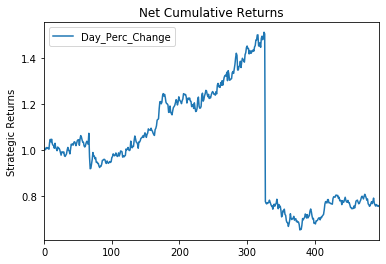

In [76]:
#Cumulative Returns 
infy['Day_Perc_Change'] = infy['Close Price'].pct_change()

daily_cr = ((infy['Day_Perc_Change']+1).cumprod()).plot(title = "Net Cumulative Returns")
daily_cr.set_ylabel("Strategic Returns")
daily_cr.legend()